<a href="https://colab.research.google.com/github/jrohauer/ECGR4105_Paper/blob/main/Classical_Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install fredpy
#import fredpy as fp
#fp.api_key='3dbaf5ec8785a171ddd51e0225936bc2'

In [ ]:
#GETTING THE DATA
file_path = '/content/drive/My Drive/ML_data/ML_FinalProject/Finance_Datasets/dataset.csv'
dataset = pd.read_csv(file_path)

X = dataset.loc[:, ~dataset.columns.isin(['SPX','Date'])]
Y = dataset['SPX'].values

In [ ]:
#PREPROCESSING


#Scalar normalization
#scalerMM = MinMaxScaler()
scalerSS = StandardScaler()


#Min Max or Standard normalize
X = scalerSS.fit_transform(X)

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# # Define models
# svc = SVC()
# pca = PCA()
# pipeline = make_pipeline(pca, svc)

# # Define parameters
# param_grid = {
#     'pca__n_components': [3, 4, 5, 6, 7],
#     'svc__C': [0.1, 1, 10, 100],
#     'svc__gamma': [0.001, 0.01, 0.1, 1],
#     'svc__kernel': ['poly'], #poly 'linear', 'rbf', 'sigmoid'
#     'svc__degree': [2, 3, 4]
# }

# # GRID SEARCH
# k='precision'
# grid_search = GridSearchCV(pipeline, param_grid, scoring=k, verbose=2, n_jobs=10)
# grid_search.fit(X_train, Y_train)
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# Y_pred = best_model.predict(X_test)


# accuracy = metrics.accuracy_score(Y_test, Y_pred)
# precision = metrics.precision_score(Y_test, Y_pred)
# recall = metrics.recall_score(Y_test, Y_pred)
# f1 = metrics.f1_score(Y_test, Y_pred)
# print("Best model - Accuracy: ", accuracy)
# print("Best model - Recall: ", recall)
# print("Best model - Precision: ", precision)
# print("Best model - F1: ", f1)



#Final Model off of the grid search / best precision:
#Best parameters found:  {'pca__n_components': 6, 'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
#Best model - Accuracy:  0.5609756097560976
#Best model - Recall:  0.7169811320754716
#Best model - Precision:  0.6440677966101694
#Best model - F1:  0.6785714285714285


In [ ]:
# Fit regression model

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
svc_rbf = SVC(kernel='rbf', C=10, gamma=0.1)
Y_pred = svc_rbf.fit(X_train, Y_train).predict(X_test)


accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
f1 = metrics.f1_score(Y_test, Y_pred)
print("Best model - Accuracy: ", accuracy)
print("Best model - Recall: ", recall)
print("Best model - Precision: ", precision)
print("Best model - F1: ", f1)


Best model - Accuracy:  0.5975609756097561
Best model - Recall:  0.8113207547169812
Best model - Precision:  0.6515151515151515
Best model - F1:  0.7226890756302522


Text(0.5, 427.9555555555555, 'Predicted label')

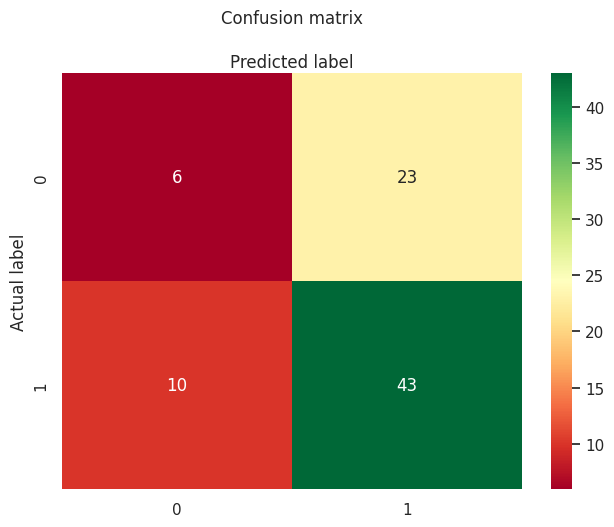

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="RdYlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')